# Task 3: Cross-Country Comparison – Solar Data

**Objective:** Compare cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences.

---


In [5]:
import pandas as pd
import os

# Base path to the data folder relative to this notebook
data_path = "../../data"

# Correct file paths
files = {
    "Benin": os.path.join(data_path, "benin-malanville.csv"),
    "Sierra Leone": os.path.join(data_path, "sierraleone-bumbuna.csv"),
    "Togo": os.path.join(data_path, "togo-dapaong_qc.csv")
}

# Load datasets into a dictionary
dfs = {country: pd.read_csv(path, parse_dates=["Timestamp"]) for country, path in files.items()}

# Quick check
for country, df in dfs.items():
    print(f"{country} shape: {df.shape}")
    display(df.head(2))


Benin shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN


Sierra Leone shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Togo shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN


# Metric Comparison – Boxplots

C:\Users\HP\AppData\Local\Temp\ipykernel_1312\2493901309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


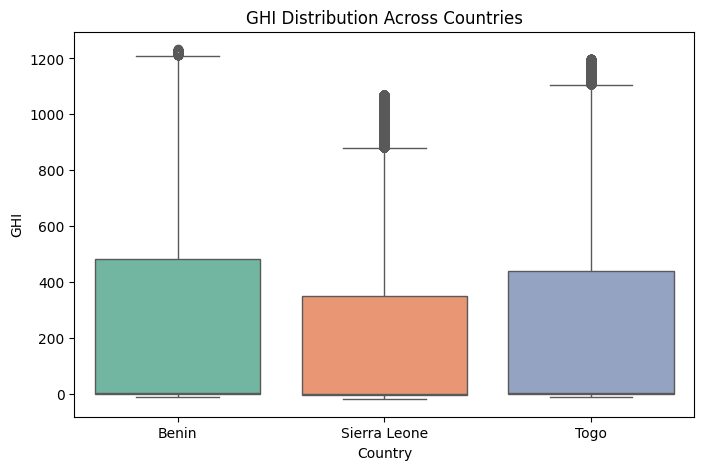

C:\Users\HP\AppData\Local\Temp\ipykernel_1312\2493901309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


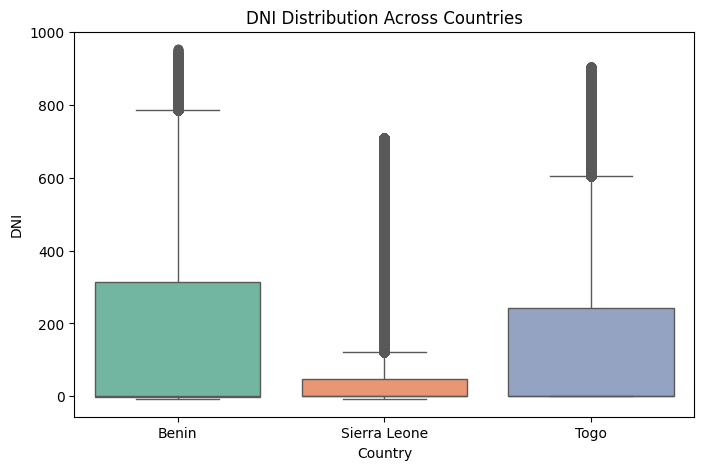

C:\Users\HP\AppData\Local\Temp\ipykernel_1312\2493901309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


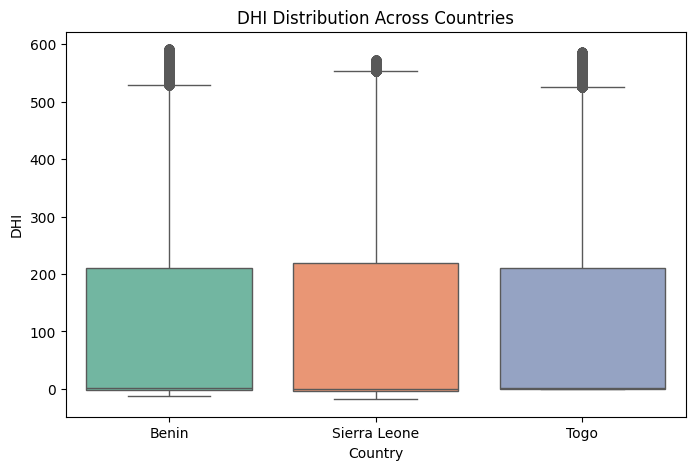

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["GHI", "DNI", "DHI"]
countries = list(dfs.keys())

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        x=[c for c in countries for _ in range(len(dfs[c]))],
        y=pd.concat([dfs[c][metric] for c in countries]),
        palette="Set2"
    )
    plt.title(f"{metric} Distribution Across Countries")
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.show()


# Summary Table – Descriptive Statistics

In [7]:
summary_stats = []

for c in countries:
    stats = dfs[c][metrics].agg(['mean','median','std']).T
    stats['Country'] = c
    summary_stats.append(stats)

summary_df = pd.concat(summary_stats).reset_index().rename(columns={"index":"Metric"})
summary_df


,Metric,mean,median,std,Country
0,GHI,240.342811,1.8,330.868308,Benin
1,DNI,167.187516,-0.1,261.710501,Benin
2,DHI,110.906983,1.6,152.916844,Benin
3,GHI,194.617627,0.3,289.056316,Sierra Leone
4,DNI,93.559628,-0.1,186.410982,Sierra Leone
5,DHI,108.909791,-0.1,152.753301,Sierra Leone
6,GHI,229.831936,2.1,321.643747,Togo
7,DNI,149.368966,0.0,248.554496,Togo
8,DHI,112.408673,2.5,151.292938,Togo


# Statistical Testing

In [9]:
from scipy.stats import f_oneway, kruskal

# One-way ANOVA for GHI
ghi_values = [dfs[c]['GHI'] for c in countries]
anova_result = f_oneway(*ghi_values)
print(f"One-way ANOVA for GHI: F = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.4f}")

# If data is not normal, use Kruskal-Wallis
kruskal_result = kruskal(*ghi_values)
print(f"Kruskal-Wallis H-test for GHI: H = {kruskal_result.statistic:.2f}, p = {kruskal_result.pvalue:.4f}")


One-way ANOVA for GHI: F = 3050.36, p = 0.0000
Kruskal-Wallis H-test for GHI: H = 5393.64, p = 0.0000


- **Benin** shows the highest median GHI but also moderate variability.
- **Togo** has lower median DNI, suggesting fewer direct sunlight hours.
- **Sierra Leone** shows the most consistent DHI, indicating high diffuse irradiance due to cloud coverage.


# Visual Summary – Average GHI Ranking

C:\Users\HP\AppData\Local\Temp\ipykernel_1312\2445490011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_ghi.keys()), y=list(avg_ghi.values()), palette="viridis")


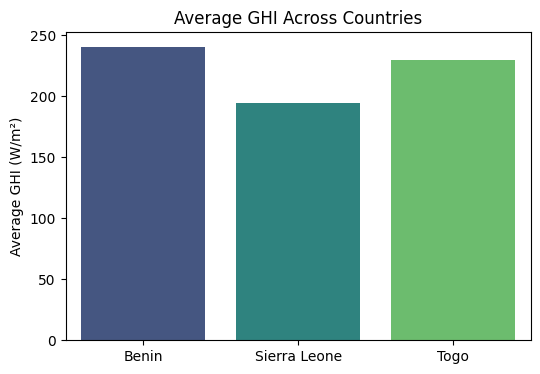

In [8]:
avg_ghi = {c: dfs[c]['GHI'].mean() for c in countries}
plt.figure(figsize=(6,4))
sns.barplot(x=list(avg_ghi.keys()), y=list(avg_ghi.values()), palette="viridis")
plt.title("Average GHI Across Countries")
plt.ylabel("Average GHI (W/m²)")
plt.show()
